In [323]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
# project 1 car price prediction using machine learning

#problem statement : we have to predict the predict the price of used cars, we have info about the cars, we do have data set with many features.
# data set features :  1. car brand 2. year 3.sold price 4.present price 5. kms driven 6.fuel type 7. seller type 8. transmission type 9.owners
# using these features in the data set, i will be training my ml algorithm to find patterns in the data set.

**work flow**<br>
1. data collection.<br>
2. preprocess data.<br>
3. split your data into training data and testing data ( train test split), here we will train our model with training data and    evaluate our model with test data.<br>
4. now, we can feed this to regression model<br> use linear and lasso and see or compare  which accuracy score or error           percentage and see which one is better.<br>
5. here we are predicting one particular value. this is a regression problem.



In [324]:
car_data = pd.read_csv("C:\\Users\\welcome\\Desktop\\ML Projects\\car price prediction\\car data.csv")

In [325]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [326]:
#checking total data points or rows and columns in the entire data set
car_data.shape

(301, 9)

In [327]:
# we can train our model with selling price and all other features of the car at first, once it learns from the data set, then we can give new info then model will predict.
#getting info about data set

In [328]:
car_data.info()
#we dont have any misiing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [329]:
#this funtion will tell us how many missing values we have.
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [330]:
#lets check the distribution of categorical data. 
#we will see how these categories are distributed
car_data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

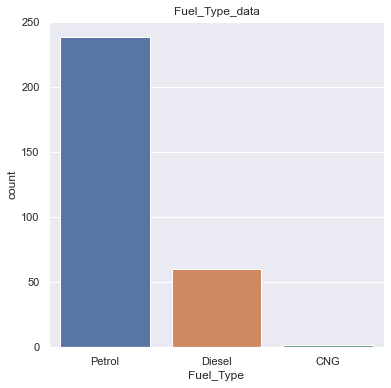

In [331]:
# Fuel_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Fuel_Type', data= car_data)
plt.title('Fuel_Type_data')
plt.show()

In [332]:
car_data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [333]:
car_data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [334]:
car_data.Selling_Price.value_counts()

0.60     8
0.45     8
4.50     7
5.25     7
4.75     6
        ..
0.51     1
3.15     1
11.45    1
6.85     1
20.75    1
Name: Selling_Price, Length: 156, dtype: int64

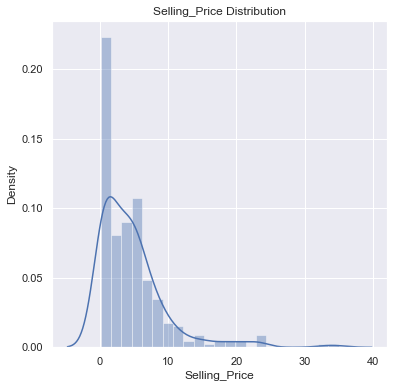

In [335]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(car_data['Selling_Price'])
plt.title('Selling_Price Distribution')
plt.show()

In [336]:
#convert your text to numerical value by encoding the data
#computers understand numbers rather than numbers
#encoding the categorical data
# we can replace each coloumn with replace function and mention the suitable values we want.

In [337]:
#encoding the categorical data of fuel type coloumn
car_data.replace({"Fuel_Type":{"Petrol" :0,"Diesel" :1,"CNG" :2}},inplace = True)

In [338]:
car_data.replace({"Seller_Type":{"Dealer" :0,"Individual" :1,}},inplace = True)

In [339]:
car_data.replace({"Transmission":{"Manual" :0,"Automatic" :1,}},inplace = True)

In [340]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Splitting our data and target**

In [341]:
# lets create our x and y variables
# in x i will store, all the values that i want..
# y is my target variable #here selling price is my target # also remove car name with selling price

X=car_data.drop(["Car_Name","Selling_Price"],axis=1)
Y=car_data["Selling_Price"]
#this will succesfully seperate my data into target and other features

In [342]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [343]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [344]:
#splitting our data into training and test data.
#here four variables, we have data and target seperately right, we have to separate data into training data and testing data
#put all the training data in x train and the testing data in x test
#then the labels or the target all the values of x train will be stored in y train and all the vales for x test will be stored in ytest
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state=2)
#if randomn state is 3 or 4, it will be splitted in other kind

Model training
1.linear regression model

In [345]:
#loading the linear regression model
linear_reg = LinearRegression()

In [346]:
#we can fit our data to this model
#we need to fit our model with x train and y train
#fit function is used to train our model
linear_reg.fit(X_train,Y_train)
#this will train our model
#linear reg is nothing but line y= mx+c, it is just normal linear function

LinearRegression()

Model evaluation

In [347]:
#model evaluation, first lets predict on training data
# use function.predict
training_data_prediction = linear_reg.predict(X_train)
#compare predicted values with the original values, here original values are y train 
#lets compare and see how our model is performing

In [348]:
#for regression we can use many metrics as r squared error, mean squared error

# R squared error
# here it will compare original(y train) with predicticed(training_data_prediction )
error_score = metrics.r2_score(Y_train,training_data_prediction)

In [349]:
error_score #here it is good
# error score of rsqured  error depends on magnitude of the value we are using

0.8799451660493701

Visualize the actual prices and Predicted prices

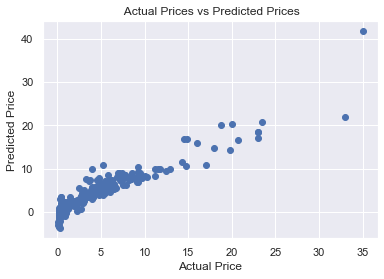

In [350]:
#Visualize the actual prices and Predicted prices
#plot the values predicted and original values, this will tell us how close the values are...and these values should be as close as possible
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
#as we can see, there is not much gap between values here, values predicted values are very close to original values.


Lets test our data with test data

In [351]:
#previously we have predicted for training data, so now lets predict for the test data..
#model evaluation, first lets predict on testing data
# use function.predict
test_data_prediction = linear_reg.predict(X_test)
#compare predicted values with the original values, here original values are y test
#lets compare and see how our model is performing

In [352]:
#let us also find r squared error
#for regression we can use many metrics as r squared error, mean squared error

# R squared error
# here it will compare original(y test) with predicticed(training_data_prediction )
error_scor = metrics.r2_score(Y_test,test_data_prediction)

In [353]:
error_scor
#it is good now

0.836576671502687

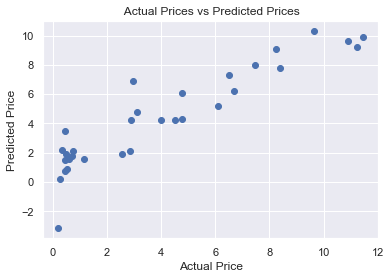

In [354]:
#lets plot the graph for test data prediction
#Visualize the actual prices and Predicted prices
#plot the values predicted and original values, this will tell us how close the values are...and these values should be as close as possible
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
#as we can see, they lie in the same line, there is no much difference or distsnce between them so if you have more values intraining and testing data we can have great predictions


In [357]:
#ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
input_data1 = (2016,10.79,43000,1,0,0,0)
# here it in tupple data type, so change it to numpy array
# changing input_data to a numpy array, becoz it is easy to do some processing on arrays rather than tupple..
numpy_array = np.asarray(input_data1)

# reshape the array,if we dont mention reshape here, the model doesnt know that we are predicting one data point particularly
data_reshaped1 = input_data_as_numpy_array.reshape(1,-1)
#prediction will give me the selling price for ertiga..
prediction1 =  lasso_reg.predict(data_reshaped1)
print(prediction1)

print('The price for ertiga is ', prediction1[0])

[7.04992171]
The price for ertiga is  7.049921707899216


lets use lasso regression and see which one is better, generally lasso performs better in most of the cases. so, linear performs well on which are directly correlated or positively correlated ( when one variable increase and other one also increase)

Lasso Regression

In [358]:
#loading the linear regression model
lasso_reg = Lasso()

#we can fit our data to this model
#we need to fit our model with x train and y train
#fit function is used to train our model
lasso_reg.fit(X_train,Y_train)
#this will train our model



Lasso()

In [394]:
training_data_prediction2 = lasso_reg.predict(X_train)
#compare predicted values with the original values, here original values are y train 
#lets compare and see how our model is performing
#for regression we can use many metrics as r squared error, mean squared error




In [396]:
# R squared error
# here it will compare original(y train) with predicticed(training_data_prediction )
error_score = metrics.r2_score(Y_train,training_data_prediction)



In [361]:
error_score

0.8427856123435794

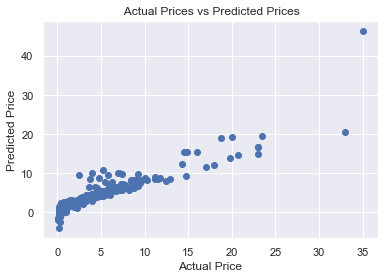

In [362]:
#Visualize the actual prices and Predicted prices
#plot the values predicted and original values, this will tell us how close the values are...and these values should be as close as possible
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()




In [363]:
#previously we have predicted for training data, so now lets predict for the test data..
#model evaluation, first lets predict on testing data
# use function.predict
test_data_prediction = lasso_reg.predict(X_test)
#compare predicted values with the original values, here original values are y test
#lets compare and see how our model is performing
#let us also find r squared error
#for regression we can use many metrics as r squared error, mean squared error



In [364]:
# R squared error
# here it will compare original(y test) with predicticed(training_data_prediction )
error_scor = metrics.r2_score(Y_test,test_data_prediction)

error_scor



0.8709167941173195

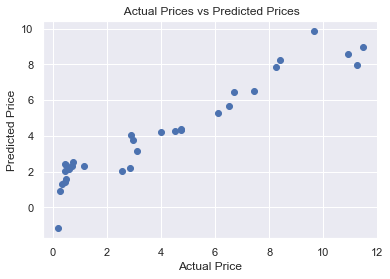

In [365]:
#lets plot the graph for test data prediction
#Visualize the actual prices and Predicted prices
#plot the values predicted and original values, this will tell us how close the values are...and these values should be as close as possible
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [366]:
#ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
input_data = (2016,10.79,43000,1,0,0,0)
# here it in tupple data type, so change it to numpy array
# changing input_data to a numpy array, becoz it is easy to do some processing on arrays rather than tupple..
data_as_numpy_array = np.asarray(input_data)

# reshape the array,if we dont mention reshape here, the model doesnt know that we are predicting one data point particularly
data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction will give me the selling price for ertiga..
prediction =  lasso_reg.predict(data_reshaped)
print(prediction)

print('The price for ertiga is ', prediction[0])

[7.04992171]
The price for ertiga is  7.049921707899216


DECISION TREE

In [367]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [368]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [369]:
!pip install six

In [370]:
from sklearn.tree import DecisionTreeRegressor

In [371]:
#instantiating my model

In [372]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [373]:
new_car_data = car_data.drop('Car_Name', axis = 1)

In [374]:
np.random.seed(0)
df_train, df_test = train_test_split(new_car_data , train_size=0.7, random_state=100)

In [375]:
df_train.shape, df_test.shape

((210, 8), (91, 8))

In [376]:
df_test.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
199,2007,0.12,0.58,53000,0,1,0,0
201,2010,3.25,6.79,58000,1,0,0,1
111,2016,1.15,1.50,8700,0,1,0,0
125,2009,0.90,1.75,40000,0,1,0,0
46,2013,2.65,4.89,64532,0,0,0,0


In [377]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [378]:
df_train['Selling_Price'] = scaler.fit_transform(df_train[['Selling_Price']])
df_test['Selling_Price'] = scaler.transform(df_test[['Selling_Price']])

In [379]:
df_train.Selling_Price.describe()

count    210.000000
mean       0.128269
std        0.145568
min        0.000000
25%        0.019015
50%        0.105913
75%        0.162959
max        1.000000
Name: Selling_Price, dtype: float64

In [380]:
y_train = df_train.pop("Selling_Price")
X_train = df_train

y_test = df_test.pop("Selling_Price")
X_test = df_test

#### Fit the Decision Tree model

In [381]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [382]:
y_train_pred = dt.predict(X_train)

In [383]:
error_score3 = metrics.r2_score(y_train, y_train_pred)

In [384]:
error_score3 

0.8897247387664534

In [385]:
y_test_pred = dt.predict(X_test)

In [386]:
error_score4 = metrics.r2_score(y_test, y_test_pred)

In [387]:
error_score4

0.7026880137879858

In [388]:
#ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
input_data2 = (2016,10.79,43000,1,0,0,0)
# here it in tupple data type, so change it to numpy array
# changing input_data to a numpy array, becoz it is easy to do some processing on arrays rather than tupple..
data_numpy_array = np.asarray(input_data2)

# reshape the array,if we dont mention reshape here, the model doesnt know that we are predicting one data point particularly
data_reshaped3 = input_data_as_numpy_array.reshape(1,-1)
#prediction will give me the selling price for ertiga..
prediction4 =  lasso_reg.predict(data_reshaped3)
print(prediction4)

print('The price for ertiga is ', prediction4[0])

[7.04992171]
The price for ertiga is  7.049921707899216
